# Comparison between SVD and Lanczos

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fastsst import SingularSpectrumTransformation

In [2]:
np.random.seed(123)

In [3]:
def plot_data_and_score(raw_data, score):
    f, ax = plt.subplots(2,1,figsize=(20,10))
    ax[0].plot(raw_data); ax[0].set_title("raw data")
    ax[1].plot(score,"r"); ax[1].set_title("score")

In [4]:
# synthetic (step function)
x0 = 1 * np.ones(1000) + np.random.rand(1000) * 1
x1 = 3 * np.ones(1000) + np.random.rand(1000) * 2
x2 = 5 * np.ones(1000) + np.random.rand(1000) * 1.5
x = np.hstack([x0, x1, x2])
x +=  + np.random.rand(x.size)

## calculation speed
The most factor affects on calculation speed is window length. In this chapter, we focus on only window length.

In [5]:
# run once in advance for jit compilation
SingularSpectrumTransformation(30).score_offline(x);

In [6]:
from timeit import default_timer


def measure_calc_time(x, param, n_iter=10):
    """Measure calculation time."""
    sst = SingularSpectrumTransformation(**param)
    
    res = []
    for i in range(n_iter):
        start = default_timer()
        sst.score_offline(x)
        end = default_timer()
        res.append(end - start)
    return sum(res) / len(res)

In [7]:
win_lengths_candidates = np.logspace(1,3,5).astype(int)

In [ ]:
methods = []; times = []; win_lengths = [];

for method in ("svd","lanczos"):
    for wl in win_lengths_candidates:
        for j in range(10):
            param = {
                "win_length": int(wl),
                "use_lanczos": True if method == "lanczos" else False
            }
            times.append(measure_calc_time(x, param, n_iter=1))
            methods.append(method)
            win_lengths.append(wl)

df = pd.DataFrame(dict(
    time=times, method=methods, win_length=win_lengths))

In [ ]:
sns.barplot(x="win_length", y="time", hue="method", data=df, linewidth=3)

## score

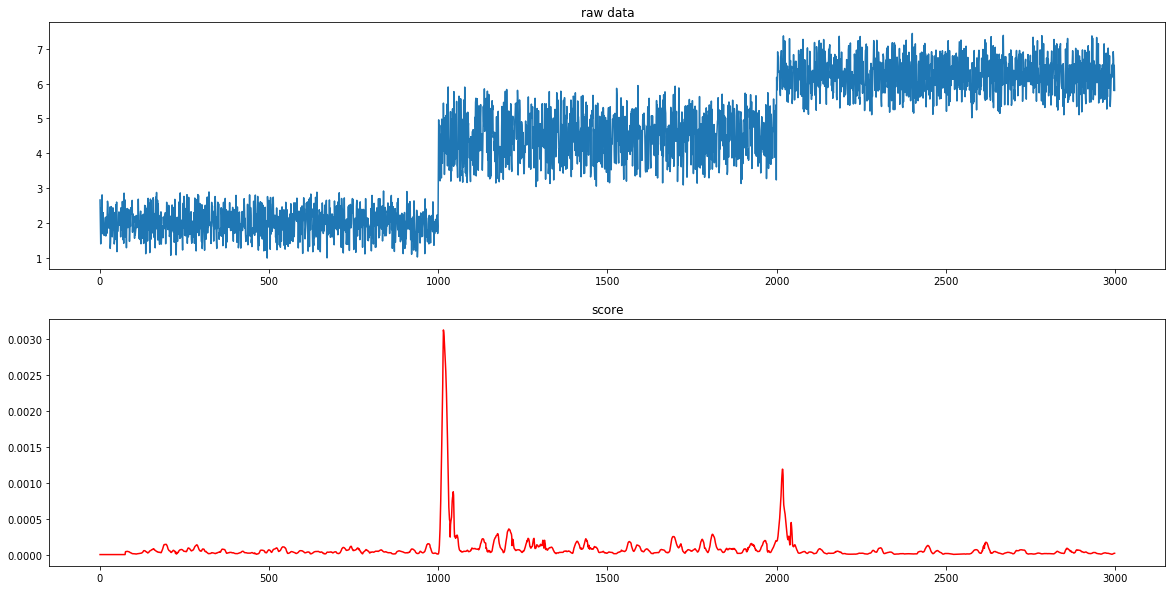

In [53]:
score = SingularSpectrumTransformation(win_length=30, n_components=2).score_offline(x)
plot_data_and_score(x,score)

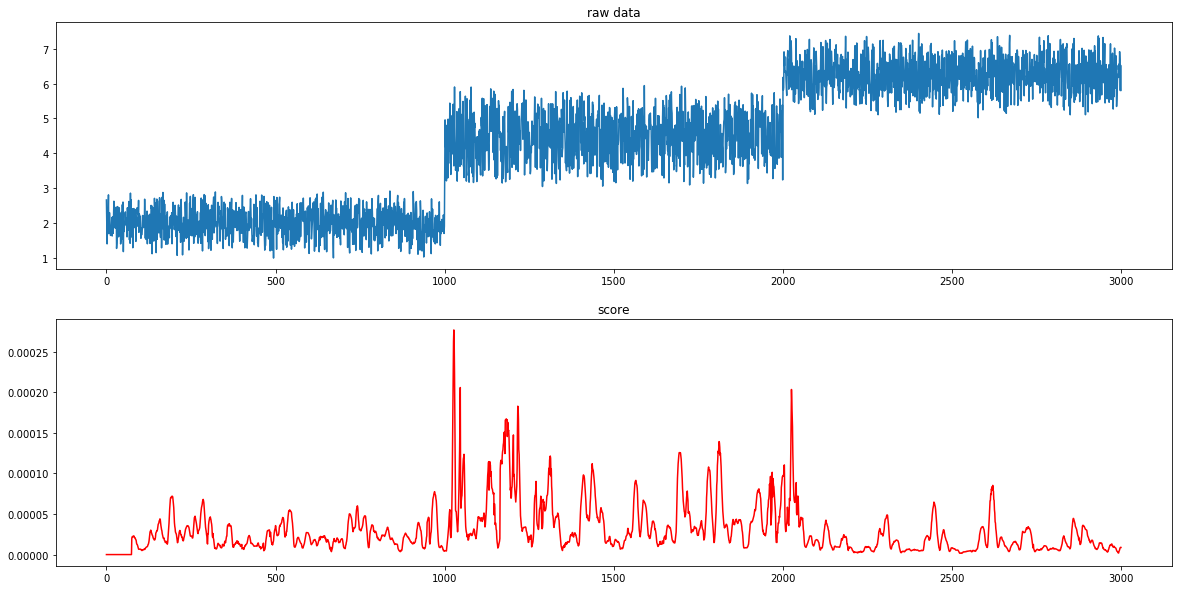

In [54]:
score = SingularSpectrumTransformation(win_length=30, n_components=2, use_lanczos=False).score_offline(x)
plot_data_and_score(x,score)  # doesn't match above!